# Zomato Data Analysis Project

The Zomato Data Analysis project entails a detailed examination of restaurant data to uncover insights into user behavior and restaurant ratings. Utilizing Python libraries such as pandas, numpy, matplotlib, and seaborn, the data is processed, analyzed, and visualized to provide a comprehensive understanding of dining trends and preferences.

--------------------------------------------------------------------------------------------------------------------------------

# 1. How to read data from database !

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [31]:
con = sqlite3.connect(r"D:\Coding Folder\DA In June A-Z\Geospatial  Analysis Project ( Zomato Case Study )\Resources/zomato_rawdata.sqlite")

In [32]:
pd.read_sql_query("SELECT * FROM Users", con).head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [33]:
df = pd.read_sql_query("SELECT * FROM Users" , con)

In [34]:
df.shape

(51717, 18)

In [35]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# 2. How to deal with missing values?

In [36]:
df.head()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [37]:
df.isnull()

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
51713,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
51714,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False
51715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [39]:
df.isnull().sum()/len(df)

index                          0.000000
url                            0.000000
address                        0.000000
name                           0.000000
online_order                   0.000000
book_table                     0.000000
rate                           0.150337
votes                          0.000000
phone                          0.023358
location                       0.000406
rest_type                      0.004389
dish_liked                     0.542916
cuisines                       0.000870
approx_cost(for two people)    0.006690
reviews_list                   0.000000
menu_item                      0.000000
listed_in(type)                0.000000
listed_in(city)                0.000000
dtype: float64

In [40]:
df.isnull().sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [41]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [42]:
df['rate'].replace(('NEW' , '-'), np.nan , inplace = True)

In [43]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [44]:
"4.1/5" .split('/')

['4.1', '5']

In [45]:
"4.1/5" .split('/')[0]

'4.1'

In [46]:
type("4.1/5" .split('/')[0])

str

In [47]:
float("4.1/5" .split('/')[0])

4.1

In [48]:
df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x) == str else x)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [49]:
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x) == str else x)

In [50]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

# 3. Is there a relation between online order option and rating of the restaurant ?

In [51]:
pd.crosstab(df['rate'] , df['online_order'])

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


In [52]:
X = pd.crosstab(df['rate'] , df['online_order'])

In [53]:
X

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

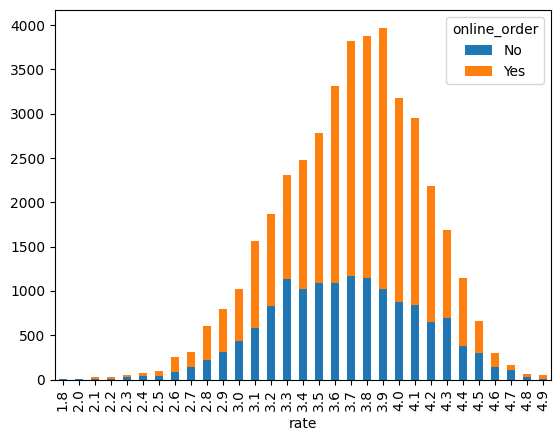

In [54]:
X.plot(kind = 'bar' , stacked = True)

In [55]:
X.sum()

online_order
No     14459
Yes    27206
dtype: int64

In [56]:
X.sum(axis = 1)

rate
1.8       5
2.0      11
2.1      24
2.2      26
2.3      51
2.4      70
2.5     101
2.6     260
2.7     307
2.8     600
2.9     802
3.0    1023
3.1    1561
3.2    1873
3.3    2310
3.4    2476
3.5    2784
3.6    3316
3.7    3821
3.8    3873
3.9    3972
4.0    3183
4.1    2948
4.2    2184
4.3    1693
4.4    1147
4.5     656
4.6     300
4.7     167
4.8      66
4.9      55
dtype: int64

In [57]:
X.sum(axis = 1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [58]:
X.div(X.sum(axis = 1).astype(float))

,No,Yes,1.8,2.0,2.1,2.2,2.3,2.4,2.5,2.6,...,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9
rate,,,,,,,,,,,,,,,,,,,,,
1.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
X.div(X.sum(axis = 1).astype(float) , axis = 0)

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


In [60]:
normalize_df = X.div(X.sum(axis = 1).astype(float) , axis = 0)

In [61]:
normalize_df

online_order,No,Yes
rate,,
1.8,1.000000,0.000000
2.0,1.000000,0.000000
2.1,0.375000,0.625000
2.2,0.384615,0.615385
2.3,0.568627,0.431373
2.4,0.514286,0.485714
2.5,0.376238,0.623762
2.6,0.319231,0.680769
2.7,0.459283,0.540717


In [62]:
normalize_df * 100

online_order,No,Yes
rate,,
1.8,100.000000,0.000000
2.0,100.000000,0.000000
2.1,37.500000,62.500000
2.2,38.461538,61.538462
2.3,56.862745,43.137255
2.4,51.428571,48.571429
2.5,37.623762,62.376238
2.6,31.923077,68.076923
2.7,45.928339,54.071661


<Axes: xlabel='rate'>

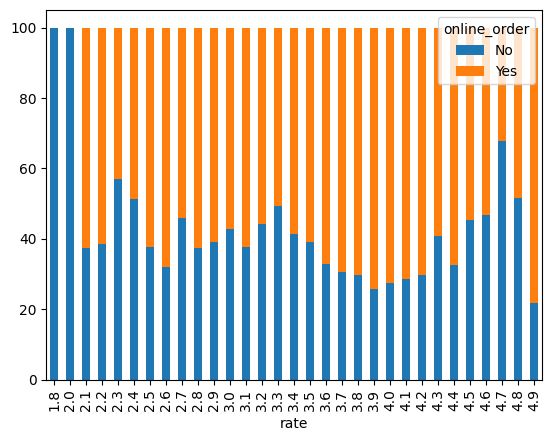

In [63]:
(normalize_df * 100).plot(kind = 'bar' , stacked = True)

# 4. Data Cleaning to perform Text Analysis

In [64]:
df['rest_type'].isnull().sum()

227

In [65]:
data = df.dropna(subset = ['rest_type'])

In [66]:
data['rest_type'].isnull().sum()

0

In [67]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [68]:
data['rest_type'].str.contains('Quick Bites')

0        False
1        False
2        False
3         True
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rest_type, Length: 51490, dtype: bool

In [69]:
data[data['rest_type'].str.contains('Quick Bites')]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",None,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400,[],[],Dine-out,Whitefield


In [70]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [71]:
quick_bites_df

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",None,"Cafe, South Indian",200,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51641,51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.2,4,None,Brookefield,Quick Bites,None,"Andhra, Chinese, South Indian",None,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield
51642,51642,https://www.zomato.com/bangalore/basaveshwara-...,"Nanjudeshwari complex, Oppsite Brookefield Mal...",Basaveshwara Khanavali,No,No,NaN,0,+91 9740912864\n+91 7353747430,Brookefield,Quick Bites,None,South Indian,200,[],[],Dine-out,Whitefield
51643,51643,https://www.zomato.com/bangalore/new-ambur-bir...,"AECS Layout, ITPL Main Road, Brookefield, Bang...",New Ambur Biryani,No,No,NaN,0,+91 9443087893,Brookefield,Quick Bites,None,"Biryani, Kebab",300,[],[],Dine-out,Whitefield
51644,51644,https://www.zomato.com/bangalore/punjabi-thadk...,"7/3, ASK Tower, Kundanahalli Gate, Next to Bat...",Punjabi Thadka,No,No,NaN,0,+91 7338330336\n+91 9591568221,Brookefield,Quick Bites,None,North Indian,400,[],[],Dine-out,Whitefield


In [72]:
quick_bites_df.shape

(20639, 18)

In [73]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [74]:
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [75]:
quick_bites_df['reviews_list'].apply(lambda x:x.lower())

3        [('rated 4.0', "rated\n  great food and proper...
23       [('rated 4.0', "rated\n  so, went here with fr...
26       [('rated 5.0', 'rated\n  please provide some e...
31       [('rated 1.0', "rated\n  worst restaurant ever...
34       [('rated 3.0', 'rated\n  not worth for the mon...
                               ...                        
51641    [('rated 2.0', "rated\n  food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('rated 5.0', "rated\n  i was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [76]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [77]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())

In [78]:
from nltk.corpus import RegexpTokenizer

In [79]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [80]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [81]:
quick_bites_df['reviews_list']

3        [('rated 4.0', "rated\n  great food and proper...
23       [('rated 4.0', "rated\n  so, went here with fr...
26       [('rated 5.0', 'rated\n  please provide some e...
31       [('rated 1.0', "rated\n  worst restaurant ever...
34       [('rated 3.0', 'rated\n  not worth for the mon...
                               ...                        
51641    [('rated 2.0', "rated\n  food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('rated 5.0', "rated\n  i was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [82]:
quick_bites_df['reviews_list'][3]

'[(\'rated 4.0\', "rated\\n  great food and proper karnataka style full meals. been there twice and was fully satisfied.. will give 5 stars if it\'s well managed............"), (\'rated 2.0\', \'rated\\n  reached the place at 3pm on saturday. half of the items on the menu were over. what was annoying was is the food was cold. the taste was also very average. only dosa and holige were good. there were very few people in the restaurant and the service was still very slow. the waiters were all standing in one corner and talking. had to call them repeatedly.\'), (\'rated 4.0\', \'rated\\n  had been here, good food served and tasty,good place to go with freinds and family, should be first to get served well with all food. one of the good hotel there for this price.\'), (\'rated 2.0\', \'rated\\n  how can a udupi restaurant be so dirty.the floor the walls the waiters are all stained in food.why cant they clean it? the floor even had decorative colour paper every where and lot of food.now com

In [83]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [84]:
sample = data[0:1000]

In [85]:
sample['reviews_list'].apply(tokenizer.tokenize)

0       [Rated, RATED, n, A, beautiful, place, to, din...
1       [Rated, RATED, n, Had, been, here, for, dinner...
2       [Rated, RATED, n, Ambience, is, not, that, goo...
3       [Rated, RATED, n, Great, food, and, proper, Ka...
4       [Rated, RATED, n, Very, good, restaurant, in, ...
                              ...                        
995     [Rated, RATED, n, Ideal, for, quick, neighborh...
996     [Rated, RATED, n, We, ordered, for, Alankrutha...
997     [Rated, RATED, n, This, review, should, have, ...
998     [Rated, RATED, n, We, tried, Chicken, Shawarma...
1000    [Rated, RATED, n, An, authentic, Andhra, cuisi...
Name: reviews_list, Length: 1000, dtype: object

In [86]:
reviews_tokens = sample['reviews_list'].apply(tokenizer.tokenize)

In [90]:
reviews_tokens

0       [Rated, RATED, n, A, beautiful, place, to, din...
1       [Rated, RATED, n, Had, been, here, for, dinner...
2       [Rated, RATED, n, Ambience, is, not, that, goo...
3       [Rated, RATED, n, Great, food, and, proper, Ka...
4       [Rated, RATED, n, Very, good, restaurant, in, ...
                              ...                        
995     [Rated, RATED, n, Ideal, for, quick, neighborh...
996     [Rated, RATED, n, We, ordered, for, Alankrutha...
997     [Rated, RATED, n, This, review, should, have, ...
998     [Rated, RATED, n, We, tried, Chicken, Shawarma...
1000    [Rated, RATED, n, An, authentic, Andhra, cuisi...
Name: reviews_list, Length: 1000, dtype: object

# 5. Performing Unigram analysis & removal of stopwords 

In [91]:
reviews_tokens

0       [Rated, RATED, n, A, beautiful, place, to, din...
1       [Rated, RATED, n, Had, been, here, for, dinner...
2       [Rated, RATED, n, Ambience, is, not, that, goo...
3       [Rated, RATED, n, Great, food, and, proper, Ka...
4       [Rated, RATED, n, Very, good, restaurant, in, ...
                              ...                        
995     [Rated, RATED, n, Ideal, for, quick, neighborh...
996     [Rated, RATED, n, We, ordered, for, Alankrutha...
997     [Rated, RATED, n, This, review, should, have, ...
998     [Rated, RATED, n, We, tried, Chicken, Shawarma...
1000    [Rated, RATED, n, An, authentic, Andhra, cuisi...
Name: reviews_list, Length: 1000, dtype: object

In [92]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\ROHIT
[nltk_data]     RAI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [94]:
stop = stopwords.words('english')

In [95]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [96]:
stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])

In [97]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [98]:
reviews_tokens

0       [Rated, RATED, n, A, beautiful, place, to, din...
1       [Rated, RATED, n, Had, been, here, for, dinner...
2       [Rated, RATED, n, Ambience, is, not, that, goo...
3       [Rated, RATED, n, Great, food, and, proper, Ka...
4       [Rated, RATED, n, Very, good, restaurant, in, ...
                              ...                        
995     [Rated, RATED, n, Ideal, for, quick, neighborh...
996     [Rated, RATED, n, We, ordered, for, Alankrutha...
997     [Rated, RATED, n, This, review, should, have, ...
998     [Rated, RATED, n, We, tried, Chicken, Shawarma...
1000    [Rated, RATED, n, An, authentic, Andhra, cuisi...
Name: reviews_list, Length: 1000, dtype: object

In [99]:
reviews_tokens[3]

['Rated',
 'RATED',
 'n',
 'Great',
 'food',
 'and',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'Rated',
 'RATED',
 'n',
 'Reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'Saturday',
 'Half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'What',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'The',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'Only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'There',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'The',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'Had',
 'to',
 'call',
 'them',
 'repeatedly',
 'Rated',
 'RATED',
 'n',
 'Had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [100]:
rev3 = reviews_tokens[3]
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [101]:
[token for token in rev3 if token not in stop]

['Great',
 'food',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'twice',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'well',
 'managed',
 'Reached',
 'place',
 'pm',
 'Saturday',
 'Half',
 'items',
 'menu',
 'What',
 'annoying',
 'food',
 'cold',
 'The',
 'taste',
 'also',
 'average',
 'Only',
 'dosa',
 'holige',
 'good',
 'There',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'The',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'Had',
 'call',
 'repeatedly',
 'Had',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'One',
 'good',
 'hotel',
 'price',
 'How',
 'Udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'Why',
 'cant',
 'clean',
 'The',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'Now',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'What',
 'upset',
 '

In [102]:
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

In [103]:
reviews_tokens.apply(lambda each_review : [token for token in rev3 if token not in stop])

0       [Great, food, proper, Karnataka, style, full, ...
1       [Great, food, proper, Karnataka, style, full, ...
2       [Great, food, proper, Karnataka, style, full, ...
3       [Great, food, proper, Karnataka, style, full, ...
4       [Great, food, proper, Karnataka, style, full, ...
                              ...                        
995     [Great, food, proper, Karnataka, style, full, ...
996     [Great, food, proper, Karnataka, style, full, ...
997     [Great, food, proper, Karnataka, style, full, ...
998     [Great, food, proper, Karnataka, style, full, ...
1000    [Great, food, proper, Karnataka, style, full, ...
Name: reviews_list, Length: 1000, dtype: object

In [104]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in rev3 if token not in stop])

In [105]:
reviews_tokens_clean

0       [Great, food, proper, Karnataka, style, full, ...
1       [Great, food, proper, Karnataka, style, full, ...
2       [Great, food, proper, Karnataka, style, full, ...
3       [Great, food, proper, Karnataka, style, full, ...
4       [Great, food, proper, Karnataka, style, full, ...
                              ...                        
995     [Great, food, proper, Karnataka, style, full, ...
996     [Great, food, proper, Karnataka, style, full, ...
997     [Great, food, proper, Karnataka, style, full, ...
998     [Great, food, proper, Karnataka, style, full, ...
1000    [Great, food, proper, Karnataka, style, full, ...
Name: reviews_list, Length: 1000, dtype: object

In [106]:
type(reviews_tokens_clean)

pandas.core.series.Series

In [107]:
total_reviews_2D = list(reviews_tokens_clean)

In [108]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

In [109]:
total_reviews_1D

['Great',
 'food',
 'proper',
 'Karnataka',
 'style',
 'full',
 'meals',
 'Been',
 'twice',
 'fully',
 'satisfied',
 'Will',
 'give',
 'stars',
 'well',
 'managed',
 'Reached',
 'place',
 'pm',
 'Saturday',
 'Half',
 'items',
 'menu',
 'What',
 'annoying',
 'food',
 'cold',
 'The',
 'taste',
 'also',
 'average',
 'Only',
 'dosa',
 'holige',
 'good',
 'There',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'The',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'Had',
 'call',
 'repeatedly',
 'Had',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'One',
 'good',
 'hotel',
 'price',
 'How',
 'Udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'Why',
 'cant',
 'clean',
 'The',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'Now',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'What',
 'upset',
 '

In [110]:
from nltk import FreqDist

In [111]:
fd = FreqDist()

In [112]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

In [113]:
fd.most_common(20)

[('I', 67000),
 ('food', 59000),
 ('south', 27000),
 ('Indian', 23000),
 ('place', 21000),
 ('good', 21000),
 ('taste', 20000),
 ('served', 17000),
 ('The', 15000),
 ('variety', 13000),
 ('quality', 13000),
 ('still', 12000),
 ('There', 11000),
 ('people', 11000),
 ('meal', 11000),
 ('leaf', 11000),
 ('authentic', 10000),
 ('But', 10000),
 ('feel', 10000),
 ('much', 10000)]

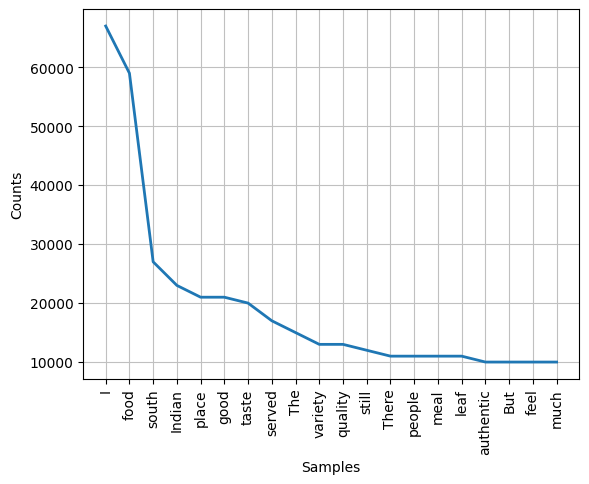

<Axes: xlabel='Samples', ylabel='Counts'>

In [114]:
fd.plot(20)

# 6. Performing Bi-gram & Trigram analysis on Data

In [115]:
from nltk import FreqDist, bigrams, trigrams

In [116]:
bi_grams = bigrams(total_reviews_1D)

In [117]:
bi_grams

<generator object bigrams at 0x000002A5F487A6C0>

In [118]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [119]:
fd_bigrams.most_common(20)

[(('south', 'Indian'), 23000),
 (('Indian', 'food'), 18000),
 (('waiting', 'staffs'), 10000),
 (('authentic', 'south'), 9000),
 (('food', 'served'), 7000),
 (('value', 'money'), 6000),
 (('food', 'quality'), 6000),
 (('quality', 'taste'), 6000),
 (('food', 'I'), 6000),
 (('Food', 'good'), 6000),
 (('Been', 'last'), 5000),
 (('last', 'week'), 5000),
 (('week', 'high'), 5000),
 (('high', 'expectations'), 5000),
 (('expectations', 'based'), 5000),
 (('based', 'reviews'), 5000),
 (('reviews', 'But'), 5000),
 (('But', 'utterly'), 5000),
 (('utterly', 'disappointed'), 5000),
 (('disappointed', 'food'), 5000)]

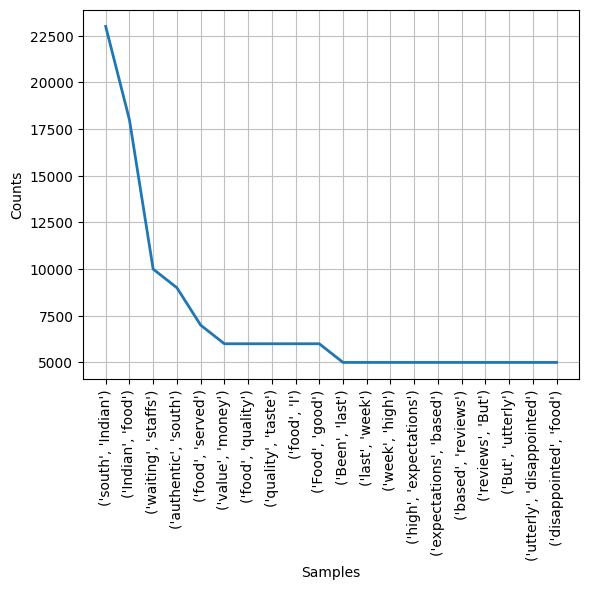

<Axes: xlabel='Samples', ylabel='Counts'>

In [120]:
fd_bigrams.plot(20)

In [121]:
fd_bigrams.most_common(100)

[(('south', 'Indian'), 23000),
 (('Indian', 'food'), 18000),
 (('waiting', 'staffs'), 10000),
 (('authentic', 'south'), 9000),
 (('food', 'served'), 7000),
 (('value', 'money'), 6000),
 (('food', 'quality'), 6000),
 (('quality', 'taste'), 6000),
 (('food', 'I'), 6000),
 (('Food', 'good'), 6000),
 (('Been', 'last'), 5000),
 (('last', 'week'), 5000),
 (('week', 'high'), 5000),
 (('high', 'expectations'), 5000),
 (('expectations', 'based'), 5000),
 (('based', 'reviews'), 5000),
 (('reviews', 'But'), 5000),
 (('But', 'utterly'), 5000),
 (('utterly', 'disappointed'), 5000),
 (('disappointed', 'food'), 5000),
 (('taste', 'I'), 5000),
 (('I', 'feel'), 5000),
 (('feel', 'overhyped'), 5000),
 (('overhyped', 'place'), 5000),
 (('place', 'There'), 5000),
 (('There', 'many'), 5000),
 (('many', 'better'), 5000),
 (('better', 'places'), 5000),
 (('places', 'vicinity'), 5000),
 (('vicinity', 'Plantain'), 5000),
 (('Plantain', 'leaf'), 5000),
 (('leaf', 'meal'), 5000),
 (('meal', 'There'), 5000),
 (('

In [122]:
tri_grams = trigrams(total_reviews_1D)

In [123]:
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [124]:
fd_trigrams.most_common(50)

[(('south', 'Indian', 'food'), 18000),
 (('authentic', 'south', 'Indian'), 7000),
 (('Indian', 'food', 'I'), 6000),
 (('Been', 'last', 'week'), 5000),
 (('last', 'week', 'high'), 5000),
 (('week', 'high', 'expectations'), 5000),
 (('high', 'expectations', 'based'), 5000),
 (('expectations', 'based', 'reviews'), 5000),
 (('based', 'reviews', 'But'), 5000),
 (('reviews', 'But', 'utterly'), 5000),
 (('But', 'utterly', 'disappointed'), 5000),
 (('utterly', 'disappointed', 'food'), 5000),
 (('disappointed', 'food', 'quality'), 5000),
 (('food', 'quality', 'taste'), 5000),
 (('quality', 'taste', 'I'), 5000),
 (('taste', 'I', 'feel'), 5000),
 (('I', 'feel', 'overhyped'), 5000),
 (('feel', 'overhyped', 'place'), 5000),
 (('overhyped', 'place', 'There'), 5000),
 (('place', 'There', 'many'), 5000),
 (('There', 'many', 'better'), 5000),
 (('many', 'better', 'places'), 5000),
 (('better', 'places', 'vicinity'), 5000),
 (('places', 'vicinity', 'Plantain'), 5000),
 (('vicinity', 'Plantain', 'leaf'),

# 7. Extract geographical coordinates from data

In [125]:
 df.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [126]:
#!pip install geocoder

In [127]:
#!pip install geopy

In [128]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [129]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [130]:
len(df['location'].unique())

94

In [131]:
df['location'] + " ,Bangalore , Karnataka, India "

0              Banashankari ,Bangalore , Karnataka, India 
1              Banashankari ,Bangalore , Karnataka, India 
2              Banashankari ,Bangalore , Karnataka, India 
3              Banashankari ,Bangalore , Karnataka, India 
4              Basavanagudi ,Bangalore , Karnataka, India 
                               ...                        
51712            Whitefield ,Bangalore , Karnataka, India 
51713            Whitefield ,Bangalore , Karnataka, India 
51714            Whitefield ,Bangalore , Karnataka, India 
51715    ITPL Main Road, Whitefield ,Bangalore , Karnat...
51716    ITPL Main Road, Whitefield ,Bangalore , Karnat...
Name: location, Length: 51717, dtype: object

In [132]:
df['location'] = df['location'] + " ,Bangalore , Karnataka, India "

In [133]:
df['location']

0              Banashankari ,Bangalore , Karnataka, India 
1              Banashankari ,Bangalore , Karnataka, India 
2              Banashankari ,Bangalore , Karnataka, India 
3              Banashankari ,Bangalore , Karnataka, India 
4              Basavanagudi ,Bangalore , Karnataka, India 
                               ...                        
51712            Whitefield ,Bangalore , Karnataka, India 
51713            Whitefield ,Bangalore , Karnataka, India 
51714            Whitefield ,Bangalore , Karnataka, India 
51715    ITPL Main Road, Whitefield ,Bangalore , Karnat...
51716    ITPL Main Road, Whitefield ,Bangalore , Karnat...
Name: location, Length: 51717, dtype: object

In [134]:
df_copy = df.copy()

In [135]:
df_copy['location'].isnull().sum()

21

In [136]:
df_copy.dropna(subset = ['location'])

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari ,Bangalore , Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari ,Bangalore , Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,"Banashankari ,Bangalore , Karnataka, India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,"Banashankari ,Bangalore , Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi ,Bangalore , Karnataka, India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,"Whitefield ,Bangalore , Karnataka, India",Bar,None,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,"Whitefield ,Bangalore , Karnataka, India",Bar,None,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,None,"Whitefield ,Bangalore , Karnataka, India",Bar,None,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield ,Bangalore , Karnat...",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [137]:
df_copy = df_copy.dropna(subset = ['location'])

In [138]:
df_copy['location'].isnull().sum()

0

In [139]:
df_copy['location'].unique()

array(['Banashankari ,Bangalore , Karnataka, India ',
       'Basavanagudi ,Bangalore , Karnataka, India ',
       'Mysore Road ,Bangalore , Karnataka, India ',
       'Jayanagar ,Bangalore , Karnataka, India ',
       'Kumaraswamy Layout ,Bangalore , Karnataka, India ',
       'Rajarajeshwari Nagar ,Bangalore , Karnataka, India ',
       'Vijay Nagar ,Bangalore , Karnataka, India ',
       'Uttarahalli ,Bangalore , Karnataka, India ',
       'JP Nagar ,Bangalore , Karnataka, India ',
       'South Bangalore ,Bangalore , Karnataka, India ',
       'City Market ,Bangalore , Karnataka, India ',
       'Nagarbhavi ,Bangalore , Karnataka, India ',
       'Bannerghatta Road ,Bangalore , Karnataka, India ',
       'BTM ,Bangalore , Karnataka, India ',
       'Kanakapura Road ,Bangalore , Karnataka, India ',
       'Bommanahalli ,Bangalore , Karnataka, India ',
       'CV Raman Nagar ,Bangalore , Karnataka, India ',
       'Electronic City ,Bangalore , Karnataka, India ',
       'HSR ,Bangalo

In [140]:
pd.DataFrame(df_copy['location'].unique())

,0
0,"Banashankari ,Bangalore , Karnataka, India"
1,"Basavanagudi ,Bangalore , Karnataka, India"
2,"Mysore Road ,Bangalore , Karnataka, India"
3,"Jayanagar ,Bangalore , Karnataka, India"
4,"Kumaraswamy Layout ,Bangalore , Karnataka, India"
...,...
88,"West Bangalore ,Bangalore , Karnataka, India"
89,"Magadi Road ,Bangalore , Karnataka, India"
90,"Yelahanka ,Bangalore , Karnataka, India"
91,"Sahakara Nagar ,Bangalore , Karnataka, India"


In [141]:
locations = pd.DataFrame(df_copy['location'].unique())

In [142]:
locations

,0
0,"Banashankari ,Bangalore , Karnataka, India"
1,"Basavanagudi ,Bangalore , Karnataka, India"
2,"Mysore Road ,Bangalore , Karnataka, India"
3,"Jayanagar ,Bangalore , Karnataka, India"
4,"Kumaraswamy Layout ,Bangalore , Karnataka, India"
...,...
88,"West Bangalore ,Bangalore , Karnataka, India"
89,"Magadi Road ,Bangalore , Karnataka, India"
90,"Yelahanka ,Bangalore , Karnataka, India"
91,"Sahakara Nagar ,Bangalore , Karnataka, India"


In [143]:
locations.columns = ['name']

In [144]:
locations

,name
0,"Banashankari ,Bangalore , Karnataka, India"
1,"Basavanagudi ,Bangalore , Karnataka, India"
2,"Mysore Road ,Bangalore , Karnataka, India"
3,"Jayanagar ,Bangalore , Karnataka, India"
4,"Kumaraswamy Layout ,Bangalore , Karnataka, India"
...,...
88,"West Bangalore ,Bangalore , Karnataka, India"
89,"Magadi Road ,Bangalore , Karnataka, India"
90,"Yelahanka ,Bangalore , Karnataka, India"
91,"Sahakara Nagar ,Bangalore , Karnataka, India"


In [145]:
from geopy.geocoders import Nominatim

In [146]:
geolocator = Nominatim(user_agent = "app" , timeout = None)

In [147]:
lat = []
lon = []

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)
    

In [148]:
locations['latitude'] = lat
locations['longitude'] = lon

In [149]:
locations

,name,latitude,longitude
0,"Banashankari ,Bangalore , Karnataka, India",12.939333,77.553982
1,"Basavanagudi ,Bangalore , Karnataka, India",12.941726,77.575502
2,"Mysore Road ,Bangalore , Karnataka, India",12.960494,77.556961
3,"Jayanagar ,Bangalore , Karnataka, India",12.941849,77.586898
4,"Kumaraswamy Layout ,Bangalore , Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore ,Bangalore , Karnataka, India",13.009476,77.553089
89,"Magadi Road ,Bangalore , Karnataka, India",12.975608,77.555356
90,"Yelahanka ,Bangalore , Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar ,Bangalore , Karnataka, India",13.062147,77.580061


# 8. Lets build geographical Heat-Maps

In [150]:
locations.isnull().sum()

name         0
latitude     2
longitude    2
dtype: int64

In [151]:
locations[locations['latitude'].isna()]

,name,latitude,longitude
79,"Rammurthy Nagar ,Bangalore , Karnataka, India",NaN,NaN
85,"Sadashiv Nagar ,Bangalore , Karnataka, India",NaN,NaN


In [152]:
locations['latitude'][79] = 13.0163
locations['longitude'][79] = 77.6785

In [153]:
locations['latitude'][85] = 13.0068
locations['longitude'][85] = 77.5813

In [154]:
df['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51717, dtype: object

In [155]:
df['cuisines'].str.contains('North India')

0         True
1         True
2        False
3         True
4         True
         ...  
51712    False
51713    False
51714    False
51715    False
51716     True
Name: cuisines, Length: 51717, dtype: object

In [156]:
df['cuisines'].isnull().sum()

45

In [157]:
df.dropna(subset = ['cuisines'])

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari ,Bangalore , Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari ,Bangalore , Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,"Banashankari ,Bangalore , Karnataka, India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,"Banashankari ,Bangalore , Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi ,Bangalore , Karnataka, India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,"Whitefield ,Bangalore , Karnataka, India",Bar,None,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,"Whitefield ,Bangalore , Karnataka, India",Bar,None,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,None,"Whitefield ,Bangalore , Karnataka, India",Bar,None,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield ,Bangalore , Karnat...",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [158]:
df = df.dropna(subset = ['cuisines'])

In [159]:
df[df['cuisines'].str.contains('North India')]

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari ,Bangalore , Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari ,Bangalore , Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,"Banashankari ,Bangalore , Karnataka, India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,"Basavanagudi ,Bangalore , Karnataka, India",Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,+91 9980040002\r\n+91 9980063005,"Basavanagudi ,Bangalore , Karnataka, India",Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51706,51706,https://www.zomato.com/bangalore/red-glow-whit...,"Poornima Complex, Dodsworth Layout, Whitefield...",Red Glow,No,No,3.7,27,+91 9740571131,"Whitefield ,Bangalore , Karnataka, India",Pub,None,"North Indian, Continental","1,200","[('Rated 5.0', 'RATED\n Excellent place had n...",[],Pubs and bars,Whitefield
51708,51708,https://www.zomato.com/bangalore/keys-cafe-key...,"Keys Hotel, 6, 1st Phase Industrial Area, Near...",Keys Cafe - Keys Hotel,No,No,2.8,161,080 39451000\n+91 8884038484,"Whitefield ,Bangalore , Karnataka, India","Casual Dining, Bar","Salads, Coffee, Breakfast Buffet, Halwa, Chick...","Chinese, Continental, North Indian","1,200","[('Rated 3.0', 'RATED\n Place is good not tha...",[],Pubs and bars,Whitefield
51709,51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,"Whitefield ,Bangalore , Karnataka, India","Casual Dining, Bar",None,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,"Whitefield ,Bangalore , Karnataka, India","Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield


In [160]:
north_india = df[df['cuisines'].str.contains('North India')]

In [161]:
north_india.shape

(21085, 18)

In [162]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari ,Bangalore , Karnataka, India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari ,Bangalore , Karnataka, India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [163]:
north_india['location']

0              Banashankari ,Bangalore , Karnataka, India 
1              Banashankari ,Bangalore , Karnataka, India 
3              Banashankari ,Bangalore , Karnataka, India 
4              Basavanagudi ,Bangalore , Karnataka, India 
5              Basavanagudi ,Bangalore , Karnataka, India 
                               ...                        
51706            Whitefield ,Bangalore , Karnataka, India 
51708            Whitefield ,Bangalore , Karnataka, India 
51709            Whitefield ,Bangalore , Karnataka, India 
51711            Whitefield ,Bangalore , Karnataka, India 
51716    ITPL Main Road, Whitefield ,Bangalore , Karnat...
Name: location, Length: 21085, dtype: object

In [164]:
north_india['location'].value_counts()

location
BTM ,Bangalore , Karnataka, India                   2469
HSR ,Bangalore , Karnataka, India                   1123
Whitefield ,Bangalore , Karnataka, India            1059
Marathahalli ,Bangalore , Karnataka, India          1038
JP Nagar ,Bangalore , Karnataka, India               958
                                                    ... 
Hebbal ,Bangalore , Karnataka, India                   4
Jakkur ,Bangalore , Karnataka, India                   3
Central Bangalore ,Bangalore , Karnataka, India        2
West Bangalore ,Bangalore , Karnataka, India           1
Peenya ,Bangalore , Karnataka, India                   1
Name: count, Length: 90, dtype: int64

In [165]:
north_india['location'].value_counts().reset_index()

,location,count
0,"BTM ,Bangalore , Karnataka, India",2469
1,"HSR ,Bangalore , Karnataka, India",1123
2,"Whitefield ,Bangalore , Karnataka, India",1059
3,"Marathahalli ,Bangalore , Karnataka, India",1038
4,"JP Nagar ,Bangalore , Karnataka, India",958
...,...,...
85,"Hebbal ,Bangalore , Karnataka, India",4
86,"Jakkur ,Bangalore , Karnataka, India",3
87,"Central Bangalore ,Bangalore , Karnataka, India",2
88,"West Bangalore ,Bangalore , Karnataka, India",1


In [166]:
north_india['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"name"})

,name,count
0,"BTM ,Bangalore , Karnataka, India",2469
1,"HSR ,Bangalore , Karnataka, India",1123
2,"Whitefield ,Bangalore , Karnataka, India",1059
3,"Marathahalli ,Bangalore , Karnataka, India",1038
4,"JP Nagar ,Bangalore , Karnataka, India",958
...,...,...
85,"Hebbal ,Bangalore , Karnataka, India",4
86,"Jakkur ,Bangalore , Karnataka, India",3
87,"Central Bangalore ,Bangalore , Karnataka, India",2
88,"West Bangalore ,Bangalore , Karnataka, India",1


In [167]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns = {'index':'name' , "location":"name"})

In [168]:
north_india_rest_count

,name,count
0,"BTM ,Bangalore , Karnataka, India",2469
1,"HSR ,Bangalore , Karnataka, India",1123
2,"Whitefield ,Bangalore , Karnataka, India",1059
3,"Marathahalli ,Bangalore , Karnataka, India",1038
4,"JP Nagar ,Bangalore , Karnataka, India",958
...,...,...
85,"Hebbal ,Bangalore , Karnataka, India",4
86,"Jakkur ,Bangalore , Karnataka, India",3
87,"Central Bangalore ,Bangalore , Karnataka, India",2
88,"West Bangalore ,Bangalore , Karnataka, India",1


In [169]:
locations

,name,latitude,longitude
0,"Banashankari ,Bangalore , Karnataka, India",12.939333,77.553982
1,"Basavanagudi ,Bangalore , Karnataka, India",12.941726,77.575502
2,"Mysore Road ,Bangalore , Karnataka, India",12.960494,77.556961
3,"Jayanagar ,Bangalore , Karnataka, India",12.941849,77.586898
4,"Kumaraswamy Layout ,Bangalore , Karnataka, India",12.906768,77.559502
...,...,...,...
88,"West Bangalore ,Bangalore , Karnataka, India",13.009476,77.553089
89,"Magadi Road ,Bangalore , Karnataka, India",12.975608,77.555356
90,"Yelahanka ,Bangalore , Karnataka, India",13.100698,77.596345
91,"Sahakara Nagar ,Bangalore , Karnataka, India",13.062147,77.580061


In [170]:
north_india_rest_count.merge(locations , on = 'name' , how = 'left')

,name,count,latitude,longitude
0,"BTM ,Bangalore , Karnataka, India",2469,12.911276,77.604565
1,"HSR ,Bangalore , Karnataka, India",1123,12.898352,77.638424
2,"Whitefield ,Bangalore , Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli ,Bangalore , Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar ,Bangalore , Karnataka, India",958,12.909694,77.586607
...,...,...,...,...
85,"Hebbal ,Bangalore , Karnataka, India",4,13.038218,77.591900
86,"Jakkur ,Bangalore , Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore ,Bangalore , Karnataka, India",2,12.973393,77.611247
88,"West Bangalore ,Bangalore , Karnataka, India",1,13.009476,77.553089


In [171]:
heatmap_df = north_india_rest_count.merge(locations , on = 'name' , how = 'left')

In [172]:
heatmap_df

,name,count,latitude,longitude
0,"BTM ,Bangalore , Karnataka, India",2469,12.911276,77.604565
1,"HSR ,Bangalore , Karnataka, India",1123,12.898352,77.638424
2,"Whitefield ,Bangalore , Karnataka, India",1059,12.969637,77.749745
3,"Marathahalli ,Bangalore , Karnataka, India",1038,12.955257,77.698416
4,"JP Nagar ,Bangalore , Karnataka, India",958,12.909694,77.586607
...,...,...,...,...
85,"Hebbal ,Bangalore , Karnataka, India",4,13.038218,77.591900
86,"Jakkur ,Bangalore , Karnataka, India",3,13.078474,77.606894
87,"Central Bangalore ,Bangalore , Karnataka, India",2,12.973393,77.611247
88,"West Bangalore ,Bangalore , Karnataka, India",1,13.009476,77.553089


In [173]:
#!pip install folium

In [174]:
import folium

In [175]:
basemap = folium.Map()

In [176]:
basemap

In [177]:
heatmap_df.columns

Index(['name', 'count', 'latitude', 'longitude'], dtype='object')

In [178]:
from folium.plugins import HeatMap

In [179]:
HeatMap(heatmap_df[['latitude','longitude',"count"]]).add_to(basemap)

In [180]:
basemap

# 9. How to automate your task: i.e Perform Automation

In [181]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns = {'index':'name' , "location":"name"})
    heatmap_df = cuisine_rest_count.merge(locations , on = 'name' , how = 'left')
    print(heatmap_df.head(4))
    
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude','longitude',"count"]]).add_to(basemap)
    return basemap
    

In [182]:
get_heatmap('South Indian')

                                       name  count   latitude  longitude
0        BTM ,Bangalore , Karnataka, India     815  12.911276  77.604565
1   JP Nagar ,Bangalore , Karnataka, India     437  12.909694  77.586607
2        HSR ,Bangalore , Karnataka, India     436  12.898352  77.638424
3  Jayanagar ,Bangalore , Karnataka, India     416  12.941849  77.586898


In [183]:
df['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51672, dtype: object

In [184]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

# Conclusion

The Zomato Data Analysis project effectively leverages data science techniques to provide valuable insights into the restaurant industry. By analyzing trends in user ratings, geographical distribution, and customer sentiment, the project offers practical recommendations for restaurant owners and marketers to enhance their services and target their audience more effectively.